# Phân tích độ quan trọng của các features trong việc xây dựng mô hình dự đoán doanh thu phim

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt


In [11]:
# Đọc file đã mã hóa trước đó
file_path = "movies_data_encoded_full.csv"
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
df.head()

,type,rating,no_of_votes,meta_score,release_date,gross,budget,Action,Adult Animation,Adventure,...,Sweden,Switzerland,Taiwan,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,West Germany,Yugoslavia
0,1,9.1,591000.0,0.0,2013.0,0.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,5.6,19000.0,0.0,2021.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,6.7,15000.0,0.0,2023.0,0.0,0.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.isnull().sum()

type                    0
rating                  0
no_of_votes             0
meta_score              0
release_date            0
                       ..
United Arab Emirates    0
United Kingdom          0
United States           0
West Germany            0
Yugoslavia              0
Length: 549, dtype: int64

In [13]:
# Cột 'gross' là giá trị cần dự đoán
y = df['gross']
X = df.drop(columns=['gross'])

In [14]:
# Chọn số lượng đặc trưng tốt nhất (ví dụ: 20 đặc trưng)
k = 30
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Lấy danh sách các đặc trưng được chọn
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]


In [15]:
# Tạo DataFrame hiển thị tên đặc trưng và điểm số quan trọng
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Score': feature_scores
}).sort_values(by="Score", ascending=False)

# In danh sách đặc trưng quan trọng
print(feature_importance)

                Feature         Score
3                budget  10889.112118
1           no_of_votes   2953.544648
2            meta_score   1460.967150
5             Adventure   1270.749739
0                  type   1006.009539
11               Family    498.288184
22          Action Epic    457.755935
6        Adventure Epic    450.964404
12              Fantasy    409.276453
8    Computer Animation    390.357455
24   Computer Animation    384.901596
10           Fairy Tale    353.520933
16               Sci-Fi    294.472280
4                Action    283.609333
21      Urban Adventure    272.499350
17          Sci-Fi Epic    270.411248
15                Quest    251.505806
19            Superhero    230.741027
29       United Kingdom    224.160575
13         Fantasy Epic    212.525694
7             Animation    211.075451
20       Teen Adventure    205.850904
18        Sea Adventure    189.992616
25   Dinosaur Adventure    188.023832
23     Animal Adventure    135.357565
14     Jungl

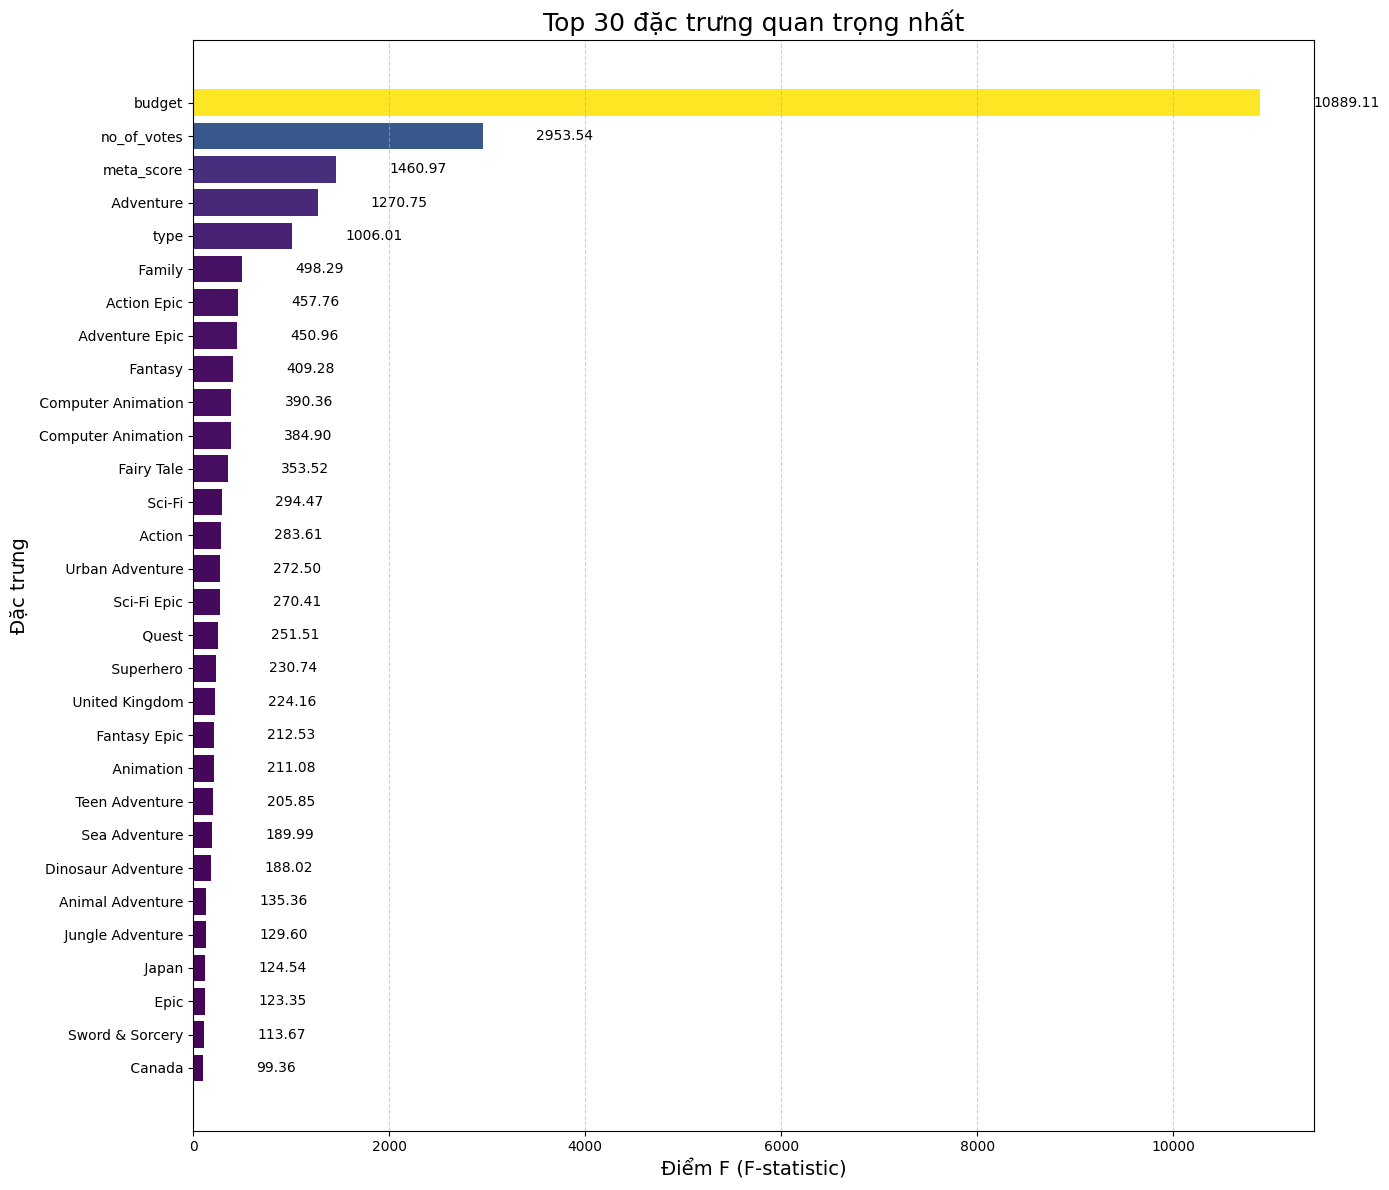

In [16]:
# Vẽ biểu đồ cột ngang cho feature importance
plt.figure(figsize=(14, 12))  # Kích thước lớn hơn để hiển thị đủ 30 đặc trưng

# Đảo ngược thứ tự để đặc trưng quan trọng nhất ở trên cùng
feature_importance_plot = feature_importance.iloc[::-1]

# Tạo bảng màu dựa trên điểm số
colors = plt.cm.viridis(feature_importance_plot['Score']/max(feature_importance_plot['Score']))

# Vẽ biểu đồ cột ngang
bars = plt.barh(feature_importance_plot['Feature'], feature_importance_plot['Score'], color=colors)

# Thêm giá trị bên cạnh mỗi thanh
for i, score in enumerate(feature_importance_plot['Score']):
    plt.text(score + 0.05*max(feature_importance_plot['Score']), i, f'{score:.2f}', va='center')

# Đặt tiêu đề và nhãn trục
plt.title('Top 30 đặc trưng quan trọng nhất', fontsize=18)
plt.xlabel('Điểm F (F-statistic)', fontsize=14)
plt.ylabel('Đặc trưng', fontsize=14)

# Thêm lưới dọc để dễ đọc giá trị
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### Kết luận:
- Budget, votes, meta_score chiếm vai trò quan trọng trong dự đoán doanh thu.
- Type cũng có vài trò quan trọng nhưng TV series thường ko có doanh thu, có thể do quá trình fillna làm nhiễu doanh thu của type nên cần xem xét cẩn thận.
- Các thể loại phim và quốc gia nhất định có vài trò quan trọng đáng kể.